In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
RawConstruction = pd.read_csv('C:\\Users\\Nikos Spanos\\Documents\\Jupyter_Lab_ReGen\\phase-a\\RawConstructionData(final).csv', delimiter=',',  index_col=0)
Schedule = pd.read_csv('C:\\Users\\Nikos Spanos\\Documents\\Jupyter_Lab_ReGen\\phase-a\\Schedule(latest).csv', delimiter=',',  index_col=0)

In [123]:
RawConstruction = RawConstruction.drop(RawConstruction.columns[RawConstruction.columns.str.contains('unnamed',case = False)],axis = 1)

In [124]:
Schedule = Schedule.drop(Schedule.columns[Schedule.columns.str.contains('unnamed',case = False)],axis = 1)

Use unique() and value_counts()

In [57]:
RawConstruction['Construction Element Type'].unique()

array(['Beam', 'Columns', 'ConcreteWall', 'Earthwork', 'Formwork',
       'Mat Foundation', 'Parapet', 'Protection Layer', 'Ramp',
       'Retaining Wall', 'Slab', 'Stair'], dtype=object)

In [52]:
RawConstruction['Construction Element Type'].value_counts()

Beam                597
Protection Layer    531
ConcreteWall        339
Columns             222
Mat Foundation      148
Formwork            146
Parapet             132
Stair                80
Retaining Wall       48
Slab                 27
Ramp                 18
Earthwork             7
Name: Construction Element Type, dtype: int64

In [54]:
RawConstruction['Construction Element Family'].unique()

array(['ConcreteWork', 'EarthWork', 'FormWork', 'ProtectionWork'],
      dtype=object)

In [55]:
RawConstruction['Construction Element Family'].value_counts()

ConcreteWork      1611
ProtectionWork     531
FormWork           146
EarthWork            7
Name: Construction Element Family, dtype: int64

6.b - Statistics

In [58]:
#6.b

RawConstruction.describe()

C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,ID,Quantity,UnitPrice,TotalCost,Length,Thickness,Height,X,Y,Z
count,2295.000000,2295.000000,2295.000000,2295.000000,1841.000000,1841.000000,1841.000000,2295.000000,2295.000000,2295.000000
mean,42998.432244,146.455399,27.081046,454.171856,5.564498,0.286464,1.617958,24.885756,18.990774,2.459532
std,5598.073473,2144.250955,38.341642,4214.520529,6.358487,0.321796,1.551904,13.021226,9.851166,4.879107
min,31571.000000,0.027000,1.000000,0.140000,0.060000,0.020000,0.150000,0.050000,-0.775000,-6.350000
25%,40890.000000,1.700000,2.000000,31.185000,NaN,NaN,NaN,13.675000,12.115500,-1.700000
50%,42765.000000,6.143000,12.000000,92.367000,NaN,NaN,NaN,25.000000,20.779000,2.375000
75%,47378.000000,42.230000,13.000000,171.509000,NaN,NaN,NaN,36.597000,25.650000,6.875000
max,53694.000000,94882.837000,99.000000,134191.431000,49.900000,3.000000,4.350000,49.950000,39.950000,11.810000


6.c EDA analysis

In [71]:
#6.c
x = RawConstruction['Quantity'].max() - RawConstruction['Quantity'].min()

In [72]:
y = RawConstruction['UnitPrice'].max() - RawConstruction['UnitPrice'].min()

In [73]:
z = RawConstruction['TotalCost'].max() - RawConstruction['TotalCost'].min()

In [74]:
w = RawConstruction['Length'].max() - RawConstruction['Length'].min()

In [75]:
range_list = [x, y, z, w]
range_list

[94882, 98.0, 134191.29099999997, 49.839999999999996]

End of 6.c

6.e - Building materials used for buidling walls (BOQ category)

In [125]:
#6.e

def wall(x):
    return 'walls' in x.lower()

Schedule[Schedule.BOQ.apply(wall)].ConstructionElementType.value_counts()

ConcreteWall      7
Columns           3
Retaining Wall    2
Name: ConstructionElementType, dtype: int64

6.f - Create a binary column

In [126]:
#6.f

RawConstruction['BiQuantity'] = pd.cut(RawConstruction['Quantity'], [0, 10, 94882837], labels=['low', 'high'])

In [35]:
# RawCon.to_csv('RawConstructionData(final).csv')

Find month function - Extract the exact month from the Start Date

In [127]:
def find_month(x):
    m = x.split('-')[1]
    if m == '01':
        return 'January'
    elif m == '02':
        return 'February'
    elif m == '03':
        return 'March'
    elif m == '04':
        return 'April'
    elif m == '05':
        return 'May'
    elif m == '06':
        return 'June'
    elif m == '07':
        return 'July'
    elif m == '08':
        return 'August'
    elif m == '09':
        return 'September'
    elif m == '10':
        return 'October'
    elif m == '11':
        return 'November'
    elif m == '12':
        return 'December'

In [128]:
Schedule['Month'] = ''
for i in range(len(Schedule)):
    Schedule['Month'].loc[i] = find_month(Schedule['START'][i])

In [129]:
# colnames(Schedule)[12] <- "Cost Overun"
Schedule['Cost Overrun'] = Schedule['Cost Overrrun'] 

In [51]:
sch_yes = Schedule[Schedule['Cost Overrun'] == 'YES'].Month.value_counts()
sch_no = Schedule[Schedule['Cost Overrun'] == 'NO'].Month.value_counts()
sch_no = sch_no[sch_yes.keys()]

Visualize the monthly Cost Overrun

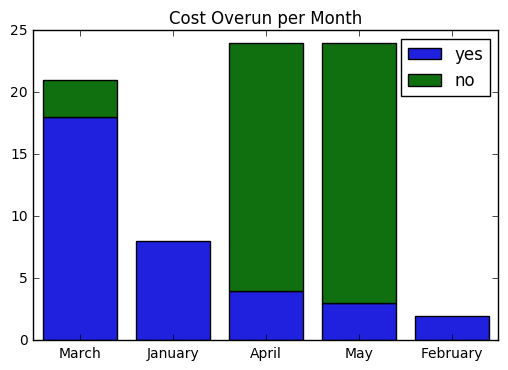

In [52]:
sns.barplot(sch_yes.keys(), sch_yes, color='blue', label='yes')
sns.barplot(sch_no.keys(), sch_no, bottom=sch_yes, color='green', label='no')
plt.title('Cost Overun per Month')
plt.ylabel('')
plt.legend()
plt.savefig('cmonth.png', bbox_inches='tight')

In [53]:
sch_yes = Schedule[Schedule['Delay'] == 'YES'].Month.value_counts()
sch_no = Schedule[Schedule['Delay'] == 'NO'].Month.value_counts()

In [54]:
sch_no = sch_no[sch_yes.keys()]

In [55]:
sch_yes

May        14
April      11
March      10
January     8
June        7
Name: Month, dtype: int64

Visualize the monthly Delay

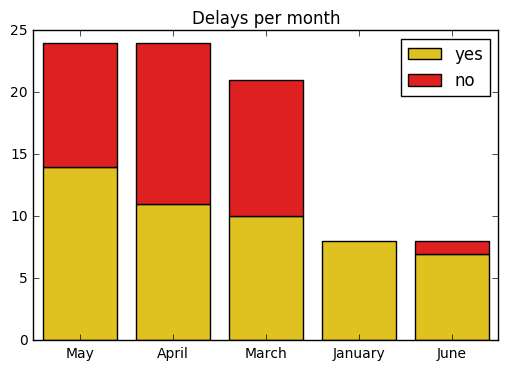

In [57]:
sns.barplot(sch_yes.keys(), sch_yes, color='gold', label='yes')
sns.barplot(sch_no.keys(), sch_no, bottom=sch_yes, color='red', label='no')
plt.title('Delays per month')
plt.ylabel('')
plt.legend()
plt.savefig('dmonth.png', bbox_inches='tight')

In [130]:
RawConstruction.to_csv('RawConstructionData(final).csv')

In [131]:
Schedule.to_csv('Schedule(latest).csv')

In [132]:
RC = pd.read_csv('C:\\Users\\Nikos Spanos\\Documents\\Jupyter_Lab_ReGen\\phase-a\\RawConstructionData(final).csv', delimiter=',')

In [133]:
SCD = pd.read_csv('C:\\Users\\Nikos Spanos\\Documents\\Jupyter_Lab_ReGen\\phase-a\\Schedule(latest).csv', delimiter=',')

In [134]:
SCD['START'] =  pd.to_datetime(SCD['START'], format='%d-%m-%Y')
x = SCD['START'].max()
y = SCD['START'].min()

newlist=[x,y]
newlist

[Timestamp('2015-06-11 00:00:00'), Timestamp('2015-01-20 00:00:00')]

In [135]:
SCD['FINISH'] =  pd.to_datetime(SCD['FINISH'], format='%d-%m-%Y')
w = SCD['FINISH'].max()
z = SCD['FINISH'].min()

newlist1=[w,z]
newlist1

[Timestamp('2015-06-13 00:00:00'), Timestamp('2015-02-17 00:00:00')]